In [76]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


In [ ]:
class state(TypedDict):
  messages:Annotated[list, add_messages]

graph_builder=StateGraph(state)

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv(dotenv_path='/content/api/.env')

True

### Step 1: Verify if the `.env` file exists

In [ ]:
!ls -l /content/api/

total 0


### Step 2: If the file exists, verify its content (replace 'YOUR_ENV_FILE_NAME' if it's not '.env')

In [77]:
# This command will display the contents of your .env file.
# IMPORTANT: Be careful not to expose sensitive information if sharing your notebook.


In [ ]:
!pip install langchain-groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 kB 10.0 MB/s eta 0:00:00


In [ ]:
from langchain_groq import ChatGroq
llm=ChatGroq(model="moonshotai/kimi-k2-instruct-0905")

In [ ]:
llm

ChatGroq(profile={'max_input_tokens': 262144, 'max_output_tokens': 16384, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x7c4bac638320>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7c4b84e29b80>, model_name='moonshotai/kimi-k2-instruct-0905', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [ ]:
def chatbot(state:state):
  return{"messages":[llm.invoke(state["messages"])]}

In [ ]:
graph_builder= StateGraph(state)
graph_builder.add_node("llmchatbot", chatbot)
graph_builder.add_edge(START, "llmchatbot")
graph_builder.add_edge("llmchatbot", END)
graph = graph_builder.compile()

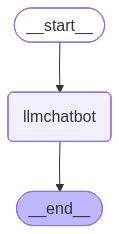

In [ ]:
from IPython.display import display, Image
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except:
  pass

In [ ]:
response= graph.invoke({"messages":"Hi"})

In [ ]:
response= graph.invoke({"messages":"whats your name"})

In [ ]:
response["messages"][-1].content

"My name is Kimi. I'm a large language model trained by Moonshot AI."

In [ ]:
for event in graph.stream({"messages":"Hi How are you sister"}):
  for value in event.values():
    print(value["messages"][-1].content)

Hey! I'm doing great, thanks for asking! 😊
How about you?


In [ ]:
!pip install langchain_tavily

In [ ]:
from google.colab import userdata
TAVILY_API_KEY = userdata.get("TAVILY_API_KEY")
from langchain_tavily import TavilySearch
tool = TavilySearch(max_results=5, tavily_api_key=TAVILY_API_KEY)
tool.invoke("what is langgraph")

{'query': 'what is langgraph',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://huggingface.co/learn/agents-course/en/unit2/langgraph/when_to_use_langgraph',
   'title': 'What is LangGraph ? - Hugging Face Agents Course',
   'content': '# What is LangGraph ? `LangGraph` is a framework developed by LangChain **to manage the control flow of applications that integrate an LLM**. ## When should I use LangGraph ? `LangGraph` is on the other end of the spectrum, it shines when you need **“Control”** on the execution of your agent. LangGraph is particularly valuable when you need **Control over your applications**. It gives you the tools to build an application that follows a predictable process while still leveraging the power of LLMs. Put simply, if your application involves a series of steps that need to be orchestrated in a specific way, with decisions being made at each junction point, **LangGraph provides the structure you need**. ## How does L

In [ ]:
def multiply(a:int,b:int) -> int:
  """Multiply a and b
  args:
  a(int) : first int
  b(int) : second int
  returns:
  int : product of a and b
  """
  return a*b

In [ ]:
tools=[tool, multiply]
llm_with_tool=llm.bind_tools(tools)
llm_with_tool

RunnableBinding(bound=ChatGroq(profile={'max_input_tokens': 262144, 'max_output_tokens': 16384, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x7c4bac638320>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7c4b84e29b80>, model_name='moonshotai/kimi-k2-instruct-0905', model_kwargs={}, groq_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'tavily_search', 'description': 'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. It not only retrieves URLs and snippets, but offers advanced search depths, domain management, time range filters, and image search, this tool delivers real-time, accurate, and citation-backed results.Inpu

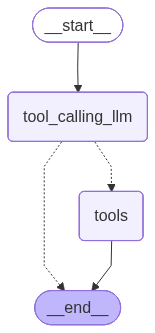

In [ ]:
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from IPython.display import display, Image
def tool_calling_llm(state:state):
  return {"messages":[llm_with_tool.invoke(state["messages"])]}
builder=StateGraph(state)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

builder.add_edge(START,"tool_calling_llm")
builder.add_conditional_edges("tool_calling_llm",
#If the latest message (result) from assistant is a tool call -> tools_condition routes to tools)
#If the latest message (result) from assistant is not a tool call -> tools_condition routes to END)
tools_condition)
builder.add_edge("tools",END)
graph= builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
response= graph.invoke({"messages":"what is qdrant db in gen ai"})

In [ ]:
response = graph.invoke({"messages": "What is the capital of France?"})
print(response["messages"][-1].content)

The capital of France is Paris.


In [ ]:
for m in response['messages']:
  m.pretty_print()

================================ Human Message =================================

What is the capital of France?
================================== Ai Message ==================================

The capital of France is Paris.


In [ ]:
response = graph.invoke({"messages": "what is 2*5 in maths"})
for m in response['messages']:
  m.pretty_print()

================================ Human Message =================================

what is 2*5 in maths
================================== Ai Message ==================================
Tool Calls:
  multiply (functions.multiply:0)
 Call ID: functions.multiply:0
  Args:
    a: 2
    b: 5
================================= Tool Message =================================
Name: multiply

10


#USING REACT (AGENTIC AI)

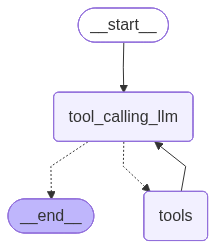

In [ ]:
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from IPython.display import display, Image
def tool_calling_llm(state:state):
  return {"messages":[llm_with_tool.invoke(state["messages"])]}
builder=StateGraph(state)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

builder.add_edge(START,"tool_calling_llm")
builder.add_conditional_edges("tool_calling_llm",
#If the latest message (result) from assistant is a tool call -> tools_condition routes to tools)
#If the latest message (result) from assistant is not a tool call -> tools_condition routes to END)
tools_condition)
builder.add_edge("tools","tool_calling_llm")
graph= builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
response = graph.invoke({"messages": "what is 2*5 in maths and who won 2025 IPL in India"})
for m in response['messages']:
  m.pretty_print()

================================ Human Message =================================

what is 2*5 in maths and who won 2025 IPL in India
================================== Ai Message ==================================

Let me help you with both of those questions!
Tool Calls:
  multiply (functions.multiply:0)
 Call ID: functions.multiply:0
  Args:
    a: 2
    b: 5
  tavily_search (functions.tavily_search:1)
 Call ID: functions.tavily_search:1
  Args:
    query: IPL 2025 winner Indian Premier League 2025 champion
    time_range: year
    topic: news
================================= Tool Message =================================
Name: multiply

10
================================= Tool Message =================================
Name: tavily_search

{"query": "IPL 2025 winner Indian Premier League 2025 champion", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.sportingnews.com/in/ipl/news/dc-rcb-ipl-2025-live-scorecard-updates-result-highlights/243

#ADDING MEMORY IN AGENTIC GRAPH

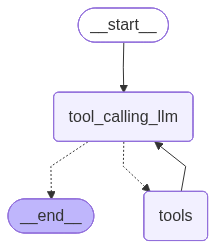

In [ ]:
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from langgraph.checkpoint.memory import MemorySaver
from IPython.display import display, Image
memory = MemorySaver()
def tool_calling_llm(state:state):
  return {"messages":[llm_with_tool.invoke(state["messages"])]}
builder=StateGraph(state)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

builder.add_edge(START,"tool_calling_llm")
builder.add_conditional_edges("tool_calling_llm",
#If the latest message (result) from assistant is a tool call -> tools_condition routes to tools)
#If the latest message (result) from assistant is not a tool call -> tools_condition routes to END)
tools_condition)
builder.add_edge("tools","tool_calling_llm")
graph= builder.compile(checkpointer=memory)
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
config={"configurable":{"thread_id":"1"}}
response = graph.invoke({"messages": "Hi my name is viraj. please dont reply more than 7 words"},config=config)
response

{'messages': [HumanMessage(content='Hi my name is viraj. please dont reply more than 7 words', additional_kwargs={}, response_metadata={}, id='9641794b-9b75-45c5-99ba-5d7521170eb0'),
  AIMessage(content='Got it, Viraj. Thanks for letting me know!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 1684, 'total_tokens': 1697, 'completion_time': 0.030558381, 'completion_tokens_details': None, 'prompt_time': 0.018664012, 'prompt_tokens_details': {'cached_tokens': 1536}, 'queue_time': 0.071635165, 'total_time': 0.049222393}, 'model_name': 'moonshotai/kimi-k2-instruct-0905', 'system_fingerprint': 'fp_3312304636', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019bbf59-9fca-7483-ac65-16c215aa8888-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 1684, 'output_tokens': 13, 'total_tokens': 1697, 'input_token_details': {'cache_read': 1536}})]}

Difference between updates and value

In [ ]:
response = graph.invoke({"messages": "what's my name how many words did i said to answer with the limit"},config=config)
print(response['messages'][-1].content)

Viraj.


In [ ]:
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()

In [ ]:
config={"configurable":{"thread_id":"3"}}
for chunk in graph.stream({"messages":"hi, my name is viraj"}, config, stream_mode="updates"):

    print(chunk)

{'tool_calling_llm': {'messages': [AIMessage(content='Hi Viraj! Nice to meet you—how can I help you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 1676, 'total_tokens': 1693, 'completion_time': 0.045813123, 'completion_tokens_details': None, 'prompt_time': 0.01982369, 'prompt_tokens_details': {'cached_tokens': 1536}, 'queue_time': 0.074323962, 'total_time': 0.065636813}, 'model_name': 'moonshotai/kimi-k2-instruct-0905', 'system_fingerprint': 'fp_3312304636', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019bbf5b-9e03-7003-ac90-8765fb70799a-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 1676, 'output_tokens': 17, 'total_tokens': 1693, 'input_token_details': {'cache_read': 1536}})]}}


In [ ]:
for chunk in graph.stream({"messages":"hi, my name is viraj"}, config, stream_mode="values"):
  print(chunk)

{'messages': [HumanMessage(content='hi, my name is viraj', additional_kwargs={}, response_metadata={}, id='2a2620b3-08a3-432e-babd-912bf508d2ed'), AIMessage(content='Hi Viraj! Nice to meet you—how can I help you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 1676, 'total_tokens': 1693, 'completion_time': 0.045813123, 'completion_tokens_details': None, 'prompt_time': 0.01982369, 'prompt_tokens_details': {'cached_tokens': 1536}, 'queue_time': 0.074323962, 'total_time': 0.065636813}, 'model_name': 'moonshotai/kimi-k2-instruct-0905', 'system_fingerprint': 'fp_3312304636', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019bbf5b-9e03-7003-ac90-8765fb70799a-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 1676, 'output_tokens': 17, 'total_tokens': 1693, 'input_token_details': {'cache_read': 1536}}), HumanMessage(content='hi, my name is viraj', a

In [ ]:
import asyncio

async def stream_events_to_console():
    config={"configurable":{"thread_id":"3"}}
    async for event in graph.astream_events({"messages":["hi, my name is viraj"]}, config, version="v2"):
        print(event)

# Run the async function
await stream_events_to_console()

{'event': 'on_chain_start', 'data': {'input': {'messages': ['hi, my name is viraj']}}, 'name': 'LangGraph', 'tags': [], 'run_id': '019bbf7e-d374-7c22-b3a7-bac79d0c2997', 'metadata': {'thread_id': '3'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='hi, my name is viraj', additional_kwargs={}, response_metadata={}, id='7a3902e7-b16c-491c-a11d-d901bd4f2a97'), AIMessage(content='Hi Viraj—nice to meet you!  \nWhat can I help you with today?', additional_kwargs={}, response_metadata={'finish_reason': 'stop', 'model_name': 'moonshotai/kimi-k2-instruct-0905', 'system_fingerprint': 'fp_3312304636', 'service_tier': 'on_demand', 'model_provider': 'groq'}, id='lc_run--019bbf7d-afed-79d2-bb7c-d5bceff72545', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 33, 'output_tokens': 19, 'total_tokens': 52}), HumanMessage(content='hi, my name is viraj', additional_kwargs={}, response_metadata={}, id='3fd5b9f3-d6d4-4979-8155-3452c301

Human in the loop

### Option 1: Disable LangSmith Tracing (to remove the warnings)

In [ ]:
import os
from langchain.chat_models import init_chat_model
llm=init_chat_model("groq:moonshotai/kimi-k2-instruct-0905")
llm

ChatGroq(profile={'max_input_tokens': 262144, 'max_output_tokens': 16384, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x7c4b84847d40>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7c4b84992ea0>, model_name='moonshotai/kimi-k2-instruct-0905', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [ ]:
from typing import Annotated

from langchain_tavily import TavilySearch
from langchain_core.tools import tool
from typing_extensions import TypedDict

from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition

from langgraph.types import Command, interrupt

class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

@tool
def human_assistance(query: str) -> str:
    """Request assistance from a human."""
    human_response = interrupt({"query": query})
    return human_response["data"]

# Retrieve TAVILY_API_KEY from Colab Secrets
from google.colab import userdata
TAVILY_API_KEY = userdata.get("TAVILY_API_KEY")

tool = TavilySearch(max_results=2, tavily_api_key=TAVILY_API_KEY)
tools = [tool, human_assistance]
llm_with_tools = llm.bind_tools(tools)

def chatbot(state: State):
    message = llm_with_tools.invoke(state["messages"])
    # Because we will be interrupting during tool execution,
    # we disable parallel tool calling to avoid repeating any
    # tool invocations when we resume.

    return {"messages": [message]}

graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")

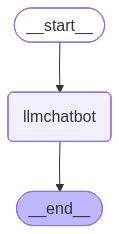

In [ ]:
memory = MemorySaver()

graph = graph_builder.compile(checkpointer=memory)
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
user_input = "I need some expert guidance and assistance for building an AI agent. Could you request assistance for me?"
config = {"configurable": {"thread_id": "1"}}

events = graph.stream(
    {"messages": user_input},
    config,
    stream_mode="values",
)
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

I need some expert guidance and assistance for building an AI agent. Could you request assistance for me?


================================== Ai Message ==================================

Absolutely — let’s get you the right help. To make sure we connect you with the most relevant expertise, I need a bit more detail. Could you answer a few quick questions?

1. **Scope & Goal**  
   What should the agent *do*? (e.g., autonomous research, customer support, robotic control, data-pipeline automation, game-playing, etc.)

2. **Environment & Interfaces**  
   Where will it live? (web, mobile, desktop, embedded, cloud, Unity, ROS, …)  
   What APIs, sensors, or legacy systems must it talk to?

3. **Autonomy Level**  
   Is this a “copilot” that assists a human, or a fully autonomous system that runs 24×7?

4. **Data & Knowledge**  
   Do you already have labeled data, knowledge graphs, simulation environments, or reward functions?  
   Any privacy or compliance constraints (HIPAA, GDPR, ITAR, …)?

5. **Stack & Budget**  
   Any language/framework preferences (Python/PyTorch, Node, Rust, C#, …)?  

In [ ]:
human_response = (
    "We, the experts are here to help! We'd recommend you check out LangGraph to build your agent."
    " It's much more reliable and extensible than simple autonomous agents."
)

human_command = Command(resume={"data": human_response})

events = graph.stream(human_command, config, stream_mode="values")
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================== Ai Message ==================================

Hey Viraj! Third time’s the charm—what would you like to talk about?


In [ ]:
import os
os.environ["LANGCHAIN_TRACING_V2"] = "false"
os.environ["LANGCHAIN_API_KEY"] = ""
print("LangSmith tracing has been disabled and API key unset.")
memory = MemorySaver()

graph = graph_builder.compile(checkpointer=memory)

LangSmith tracing has been disabled and API key unset.


If you wish to use LangSmith, you would instead set `LANGCHAIN_TRACING_V2 = "true"` and provide a valid API key for `LANGCHAIN_API_KEY` (preferably using `google.colab.userdata.get('LANGCHAIN_API_KEY')`).

### Option 2: Set up LangSmith with a valid API Key from Colab Secrets

In [ ]:
import os
from google.colab import userdata

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_API_KEY"] = userdata.get('LANGCHAIN_API_KEY')

print("LangSmith tracing enabled. Make sure your LANGCHAIN_API_KEY is set in Colab Secrets.")

LangSmith tracing enabled. Make sure your LANGCHAIN_API_KEY is set in Colab Secrets.
